In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

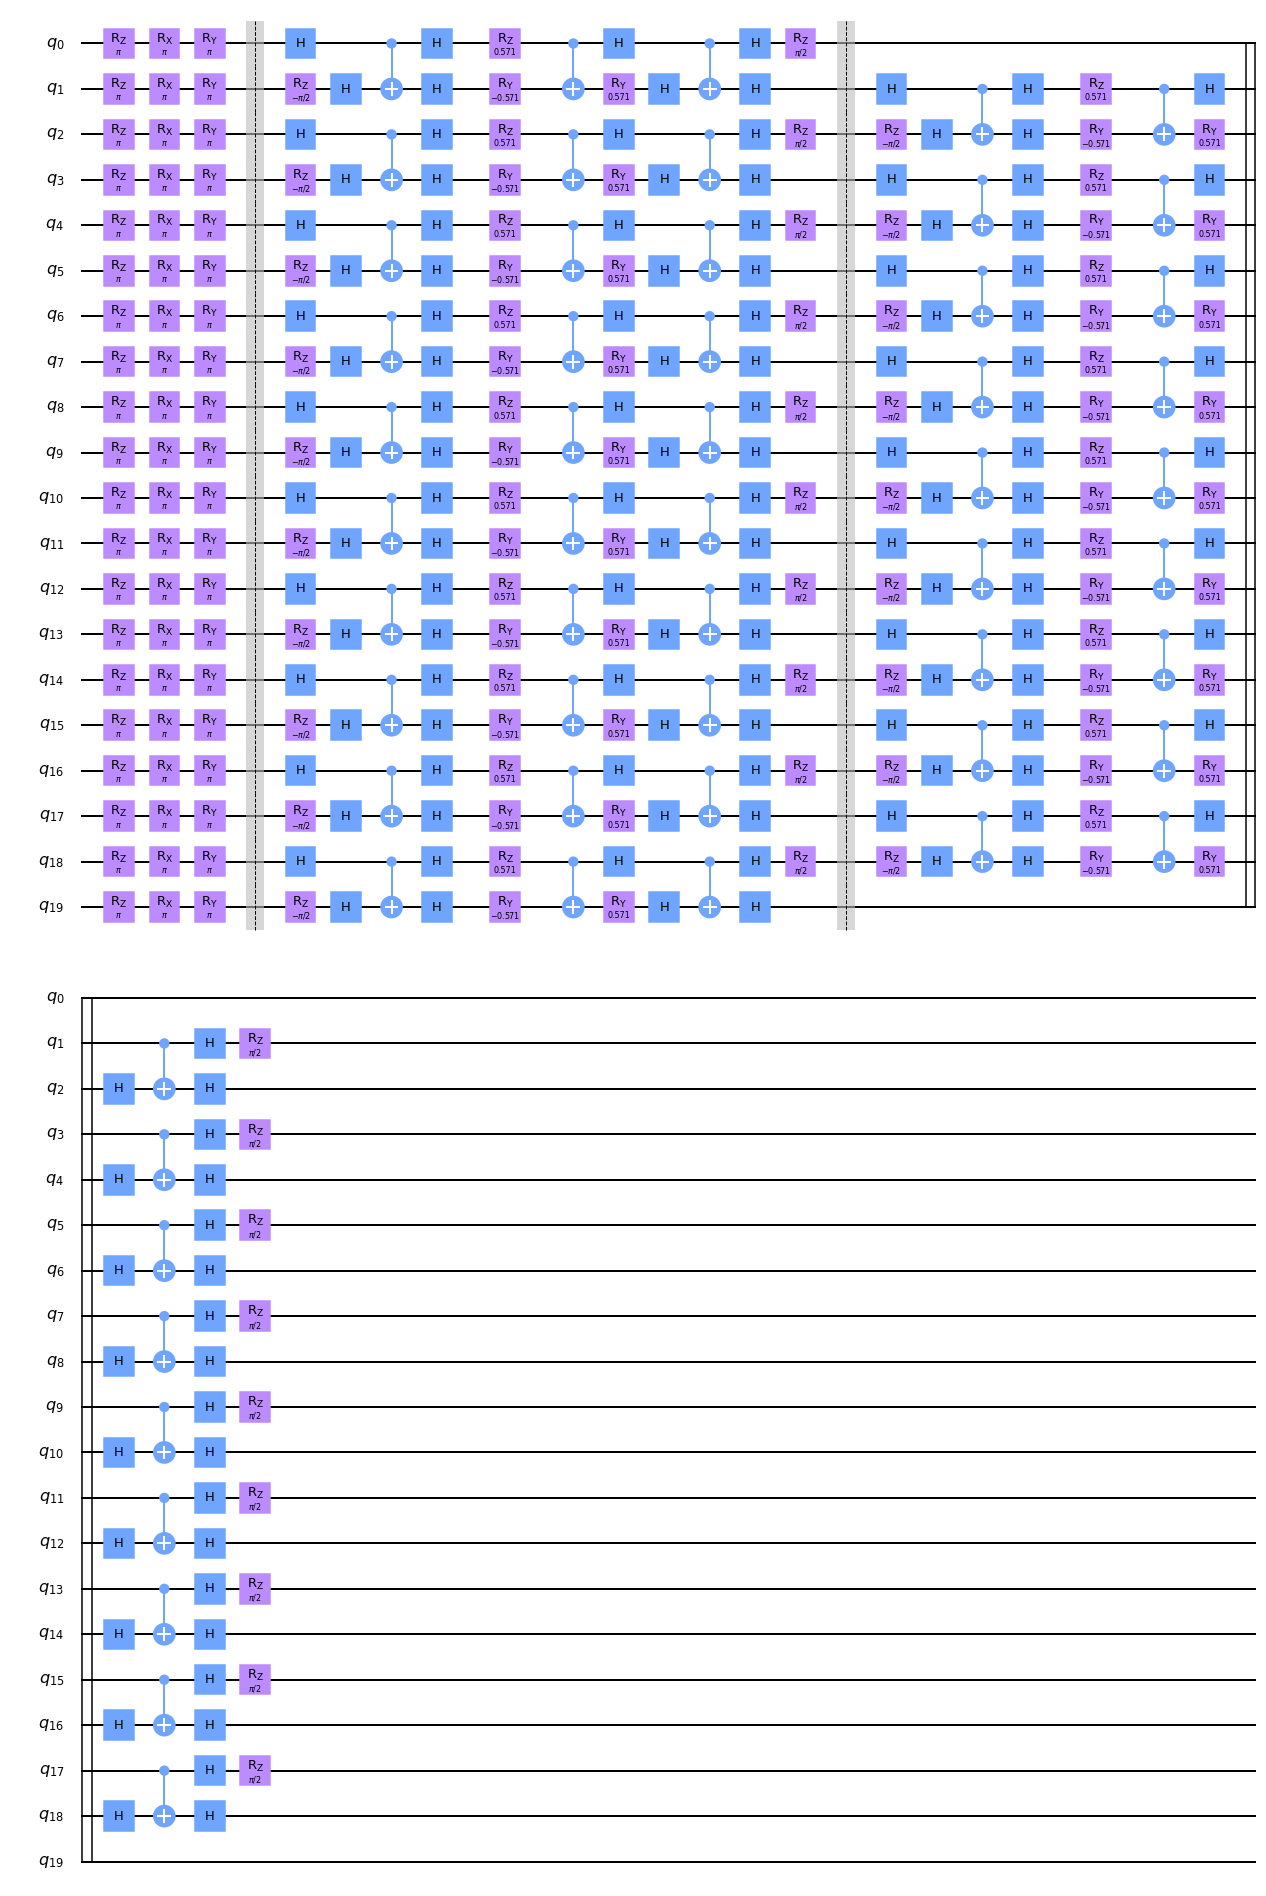

In [57]:
# can I construct a quantum circuit call it in from
# a function?

# I first need to define the quantum circuit outside
# of the function that I will call to
num_q = 20
qc = QuantumCircuit(num_q)


def rotations(q):
    # this is the segment of the quantum circuit
    # that will evolve to the external magnetic 
    # field
    for i in range(num_q):
        q.rz(pi,i)
        q.rx(pi,i)
        q.ry(pi,i)
    
    q.barrier()
    # Here is the odd qubit exponentiation operation
    for i in range(num_q):
        if ((i%2)==0 and (i <= (num_q)-2)):
            q.rz(-pi/2,i+1)
            q.h(i)
            q.h(i+1)
            q.cx(i,i+1)
            q.h(i)
            q.h(i+1)
            q.rz(pi/2-1,i)
            q.ry(1-pi/2,i+1)
            q.cx(i,i+1)
            q.ry(pi/2-1,i+1)
            q.h(i)
            q.h(i+1)
            q.cx(i,i+1)
            q.h(i)
            q.h(i+1)
            q.rz(pi/2,i)
    
    q.barrier()
    # Here is the evenqubit exponentiation operation
    for i in range(num_q):
        if ((i%2)==1 and (i <= (num_q)-2)):
            q.rz(-pi/2,i+1)
            q.h(i)
            q.h(i+1)
            q.cx(i,i+1)
            q.h(i)
            q.h(i+1)
            q.rz(pi/2-1,i)
            q.ry(1-pi/2,i+1)
            q.cx(i,i+1)
            q.ry(pi/2-1,i+1)
            q.h(i)
            q.h(i+1)
            q.cx(i,i+1)
            q.h(i)
            q.h(i+1)
            q.rz(pi/2,i)
        
    
# seems like the qc.draw needs to be outside the
# function
rotations(qc)
qc.draw(output='mpl')

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Bell-State counts')